# Close-ups of East and West side of Solomon Strait
*Akira Di Sandro, 6/19/20*
<br>
In this notebook, I will be making closeups of the east and west side of the Solomon Strait to clarify the points I want to plug into ../sectionate/examples/aki_example2.ipynb

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [5]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')

In [6]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [7]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * bnds       (bnds) float64 1.0 2.0
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    parent_activity_id:      CMIP
    parent_variant_label:    r1i1p1f1
    status:                  2019-08-06;created;by nhn2@columbia.edu
    institution:             National Oceanic and Atmospheric Administration,...
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    source_id:               GFDL-CM4
    physics_index:           1
    source_type:             AOGCM
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    mip_era:                 CMIP6
    parent_time_units:       days since 0001-1-1
    sub_experiment:          none
    frequency:               mon
    parent_mip_era:          CMIP6
    branch_time_in_parent:   36500.0
    contact:                 gfdl.climate.model.info@noaa.gov
    institution_id:          NOAA-GFDL
    branch_method:           standard
    references:              see further_info_url attribute
    experiment:              historical
    branch_time_in_child:    0.0
    parent_experiment_id:    piControl
    grid_label:              gn
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    nominal_resolution:      25 km
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    forcing_index:           1
    experiment_id:           historical
    activity_id:             CMIP
    realm:                   ocean
    table_id:                Omon
    variant_label:           r1i1p1f1
    parent_source_id:        GFDL-CM4
    history:                 File was processed by fremetar (GFDL analog of C...
    product:                 model-output
    variant_info:            N/A
    comment:                 <null ref>
    realization_index:       1
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    data_specs_version:      01.00.27
    sub_experiment_id:       none
    initialization_index:    1
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [8]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [9]:
client

Client Scheduler: gateway://traefik-ocean-prod-dask-gateway.ocean-prod:80/ocean-prod.6a204e6bdd0749e4b69c438398f4e520 Dashboard: https://ocean.pangeo.io/services/dask-gateway/clusters/ocean-prod.6a204e6bdd0749e4b69c438398f4e520/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


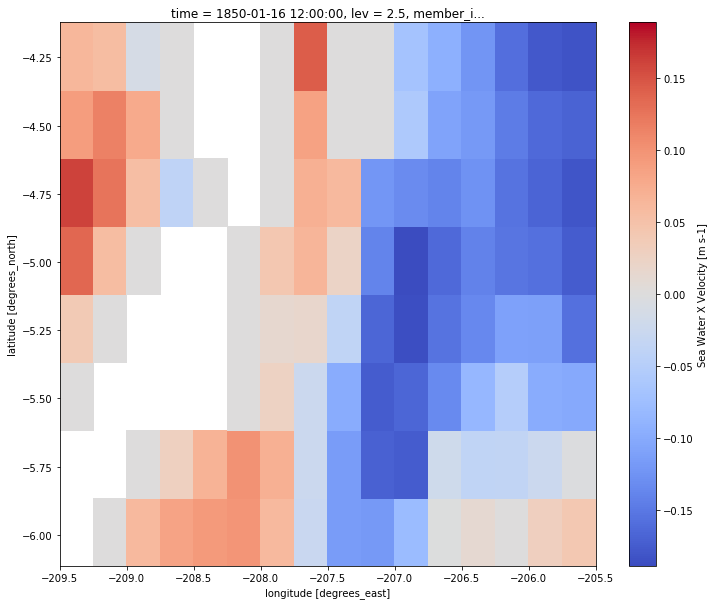

In [10]:
#west soloman strait map
wss_map = CM4_hist['uo'].sel(member_id='r1i1p1f1',lev=2.5, time=CM4_hist.time[0]).sel(y=slice(-6,-4)).sel(x=slice(-210,-206))
wss_plot = wss_map.plot(x='lon', y='lat', cmap='coolwarm', figsize=[12, 10])

In [11]:
wss_map

<xarray.DataArray 'uo' (y: 8, x: 16)>
dask.array<getitem, shape=(8, 16), dtype=float32, chunksize=(8, 16), chunktype=numpy.ndarray>
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(8, 16), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(8, 16), meta=np.ndarray>
    time       object 1850-01-16 12:00:00
  * x          (x) float64 -209.9 -209.7 -209.5 -209.2 ... -206.7 -206.5 -206.2
    lev        float64 2.5
  * y          (y) float64 -5.989 -5.74 -5.492 -5.243 ... -4.745 -4.495 -4.246
    member_id  <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

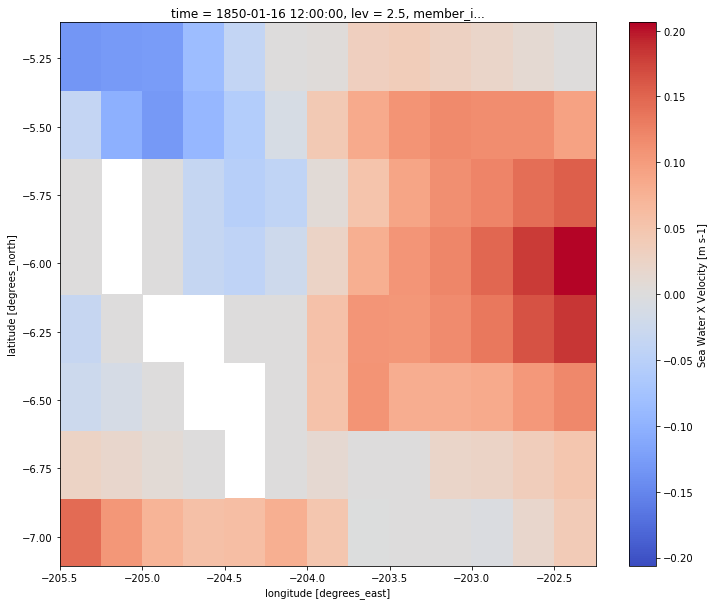

In [13]:
#east soloman strait map
ess_map = CM4_hist['uo'].sel(member_id='r1i1p1f1',lev=2.5, time=CM4_hist.time[0]).sel(y=slice(-7,-5)).sel(x=slice(-206,-203))
ess_plot = ess_map.plot(x='lon', y='lat', cmap='coolwarm', figsize=[12, 10])

In [14]:
ess_map

<xarray.DataArray 'uo' (y: 8, x: 13)>
dask.array<getitem, shape=(8, 13), dtype=float32, chunksize=(8, 13), chunktype=numpy.ndarray>
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(8, 13), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(8, 13), meta=np.ndarray>
    time       object 1850-01-16 12:00:00
  * x          (x) float64 -206.0 -205.7 -205.5 -205.2 ... -203.5 -203.2 -203.0
    lev        float64 2.5
  * y          (y) float64 -6.983 -6.734 -6.486 -6.238 ... -5.74 -5.492 -5.243
    member_id  <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

In [15]:
client.close()
cluster.close()